In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import scipy
import matplotlib.pyplot as plt
import warnings
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore")

# Introducing Data

In [28]:
df = pd.read_csv(("thanksgiving.csv"))


#Q1. Do you celebrate Thanksgiving? - Categorical

Classes: Yes or No

#Q2. What is typically the main dish at your Thanksgiving dinner? - Categorical

Classes: Chicken, Ham/Pork, Roast Beef, Tofurkey, Turducken, Turkey

#Q3. How is the main dish typically cooked? - Categorical

Classes: Baked, Fried, Roasted

#Q4. What kind of stuffing/dressing do you typically have? - Categorical

Classes: Bread-based, Rice-based

#Q5. What type of cranberry saucedo you typically have? - Categorical

Classes: Canned, Homemade

#Q6. Do you typically have gravy? - Categorical

Classes: Yes or No

#Q7. Corn Served - Categorical

Classes: Yes or No

#Q8. Green Beans Served - Categorical

Classes: Yes or No

#Q9. Mashed Potatoes Served - Categorical

Classes: Yes or No

#Q10. Rolls/biscuits served - Categorical

Classes: Yes or No

#Q11. Yams/sweet potato casserole served - Categorical

Classes: Yes or No

#Q12. Apple Pie Served - Categorical

Classes: Yes or No

#Q13. Pecan Pie served - Categorical

Classes: Yes or No

#Q14. Pumpkin Pie served  - Categorical

Classes: Yes or No

#Q15. Do you typically pray before or after the Thanksgiving meal? - Categorical

Classes: Yes or No

#Q16. Distance will travel - Categorical

Classes: Home, local town, out of town: short or long drive

#Q17. Will you watch any of the following programs on Thanksgiving? - Categorical

Only 1 Class: Macy's Parade

#Q18. What is the age cutoff at your kids table at Thanksgiving? - Categorical

Classes: <10, 11-20, >21

#Q19. Have you ever tried to meet up with hometown friends on Thanksgiving night? - Categorical

Classes: Yes or No

#Q20. Have you ever attended a Friendsgiving? - Categorical

Classes: Yes or No

#Q21. Will you shop any Black Friday sales on Thanksgiving Day? - Categorical

Classes: Yes or No

#Q22. Do you work in retail? - Categorical

Classes: Yes or No

#Q23. How would you describe where you live? - Categorical

Classes: Rural, Suburban, Urban

#Q24. Age - Numerical

Classes: 18-29, 30-44, 45-59, 60+

#Q25. What is your gender? - Categorical

Classes: Male, Female

#Q26. How much total combined money did all members of your HOUSEHOLD earn last year? - Numerical

Classes: <10K, 10-24.999K, 25-49.999K, 50-74.999K, 75-99.999K, 100-124.999K, 125-149.999K, 150-174.999K, 175-199.999K, 200K+

#Q27. US Region - Categorical

Classes: Middle Atlantic, East South Central, Mountain, Pacific, East North Central, West North Central, East North Central, West South Central, South Atlantic

I got this data from https://www.statcrunch.com/app/index.php?dataid=2833634

There were some changes in the data set due to some errors in the columns in this data set.

What are some of the challenges with the way the data is formatted in order to feed it into a classifier?

Breaking down the age groups and how much money each person makes for the ones that participated in this survey.


Why I chose this data set?

This data set had many categorical variables, which gave me the opportunity to tackle more challenges. Also, I was interested in finding out the type of age group that participates the most when it comes to Black Friday shopping, meeting up with friends, participating in Friendsgiving, etc.

What do I hope to find out?

I want to predict a person's age based on their Thanksgiving habits.

I want to project if younger people enjoy spending time with friends more on Thanksgiving to reunite with high school classmates.

I want to make a prediction if younger people working in retail correlate well to those who do Black Friday shopping and meeting up with friends on Thanksgiving night.

I want to predict if there a trend with younger demo when it comes to income annually.

What does success for this project look like?

What will make this project successful is to predict what age groups are the most popular with each other question and what kind of eating habits does each age group have. Success will look like producing a model that is better at predicting than random guessing.

A specified research question your model addresses:

My model will address whether the survey people's answers to the questions in the data set correlate well with age groups. To do this, I will be testing 4 different types of models and comparing three other models and decide which model projects well to this question.


In [29]:
df.dtypes

Do you celebrate Thanksgiving?                                                     object
What is typically the main dish at your Thanksgiving dinner?                       object
How is the main dish typically cooked?                                             object
What kind of stuffing/dressing do you typically have?                              object
What type of cranberry saucedo you typically have?                                 object
Do you typically have gravy?                                                       object
Corn Served                                                                        object
Green Beans Served                                                                 object
Mashed Potatoes Served                                                             object
Rolls/biscuits served                                                              object
Yams/sweet potato casserole served                                                 object
Apple Pie 

In [30]:
df.isnull().sum().sort_values(ascending=False)

Will you watch any of the following programs on Thanksgiving?                      473
US Region                                                                           44
What is your gender?                                                                27
Age                                                                                 27
How would you describe where you live?                                              27
How much total combined money did all members of your HOUSEHOLD earn last year?     27
What is the age cutoff at your kids table at Thanksgiving?                          24
Distance will travel                                                                24
Have you ever tried to meet up with hometown friends on Thanksgiving night?         24
Have you ever attended a Friendsgiving?                                             24
Will you shop any Black Friday sales on Thanksgiving Day?                           24
Do you work in retail?                     

Renaming Columns

In [31]:
df.rename(index=str, columns={"Do you celebrate Thanksgiving?": "Q1", "What is typically the main dish at your Thanksgiving dinner?": "Q2", 
                             "How is the main dish typically cooked?": "Q3",
                             "What kind of stuffing/dressing do you typically have?": "Q4", "What type of cranberry saucedo you typically have?": "Q5",
                             "Do you typically have gravy?": "Q6", "Corn Served": "Q7", "Green Beans Served": "Q8", "Mashed Potatoes Served": "Q9", 
                              "Rolls/biscuits served": "Q10", "Yams/sweet potato casserole served": "Q11", "Apple Pie Served": "Q12", 
                              "Pecan Pie served": "Q13", "Pumpkin Pie served": "Q14", "Do you typically pray before or after the Thanksgiving meal?": "Q15",
                              "Distance will travel": "Q16", "Will you watch any of the following programs on Thanksgiving?": "Q17", 
                              "What is the age cutoff at your kids table at Thanksgiving?": "Q18", "Have you ever tried to meet up with hometown friends on Thanksgiving night?": "Q19",
                              "Have you ever attended a Friendsgiving?": "Q20", "Will you shop any Black Friday sales on Thanksgiving Day?": "Q21", 
                              "Do you work in retail?": "Q22", "How would you describe where you live?": "Q23", "Age": "Q24", "What is your gender?": "Q25",
                              "How much total combined money did all members of your HOUSEHOLD earn last year?": "Q26", "US Region": "Q27"}, inplace=True)

Removing Null Values

In [32]:
df['Q2'].fillna("Uncertain",inplace = True)
df['Q3'].fillna("Uncertain",inplace = True) 
df['Q4'].fillna("Uncertain",inplace = True) 
df['Q5'].fillna("Uncertain",inplace = True) 
df['Q6'].fillna("Uncertain",inplace = True) 
df['Q8'].fillna("Uncertain",inplace = True) 
df['Q9'].fillna("Uncertain",inplace = True) 
df['Q10'].fillna("Uncertain",inplace = True) 
df['Q11'].fillna("Uncertain",inplace = True)
df['Q12'].fillna("Uncertain",inplace = True) 
df['Q13'].fillna("Uncertain",inplace = True) 
df['Q14'].fillna("Uncertain",inplace = True)
df['Q15'].fillna("Uncertain",inplace = True) 
df['Q16'].fillna("Uncertain",inplace = True) 
df['Q17'].fillna("Uncertain",inplace = True) 
df['Q18'].fillna("Uncertain",inplace = True) 
df['Q19'].fillna("Uncertain",inplace = True) 
df['Q20'].fillna("Uncertain",inplace = True) 
df['Q21'].fillna("Uncertain",inplace = True) 
df['Q22'].fillna("Uncertain",inplace = True) 
df['Q23'].fillna("Uncertain",inplace = True) 
df['Q24'].fillna("Uncertain",inplace = True) 
df['Q25'].fillna("Uncertain",inplace = True) 
df['Q26'].fillna("Uncertain",inplace = True) 
df['Q27'].fillna("Uncertain",inplace = True)


# Data Analysis

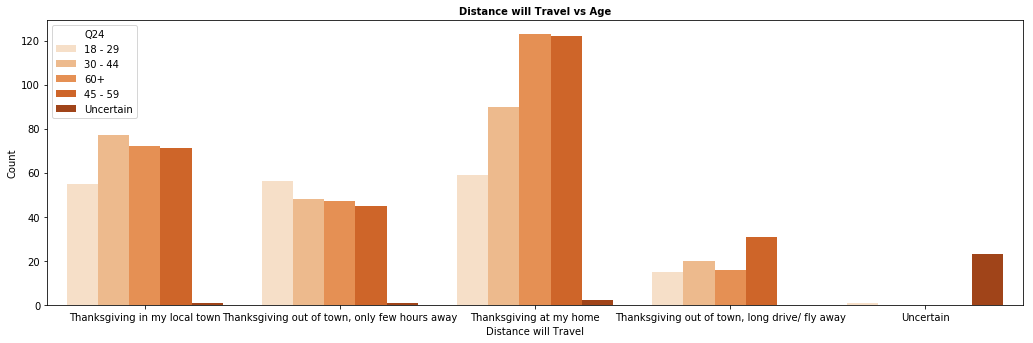

In [33]:
plt.figure(figsize=(10,5))
sns.countplot("Q16", hue="Q24", palette="Oranges",data=df)
plt.title("Distance will Travel vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Distance will Travel")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More millennials like to stay more at home for Thanksgiving and will not go out of their way to drive many hours for the holiday weekend.

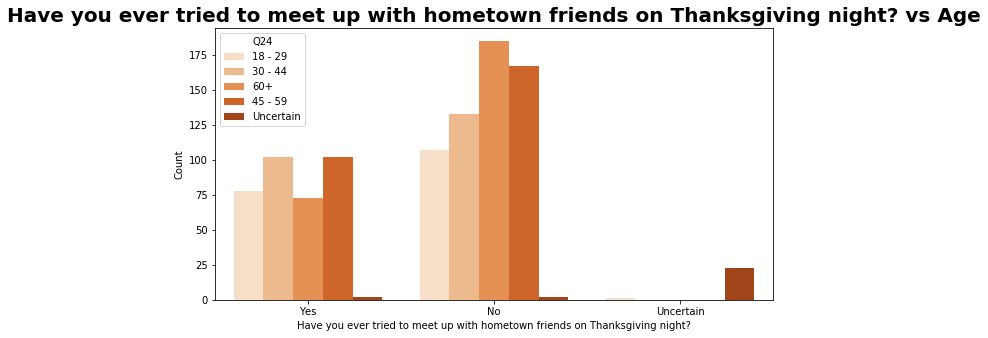

In [8]:
plt.figure(figsize=(10,5))
sns.countplot("Q19", hue="Q24", palette="Oranges",data=df)
plt.title("Have you ever tried to meet up with hometown friends on Thanksgiving night? vs Age",fontsize=20,fontweight="bold")
plt.xlabel("Have you ever tried to meet up with hometown friends on Thanksgiving night?")
plt.ylabel("Count")
plt.show()

More of the millennials like to meet up with friends during the holidays (to those who responded to Yes).

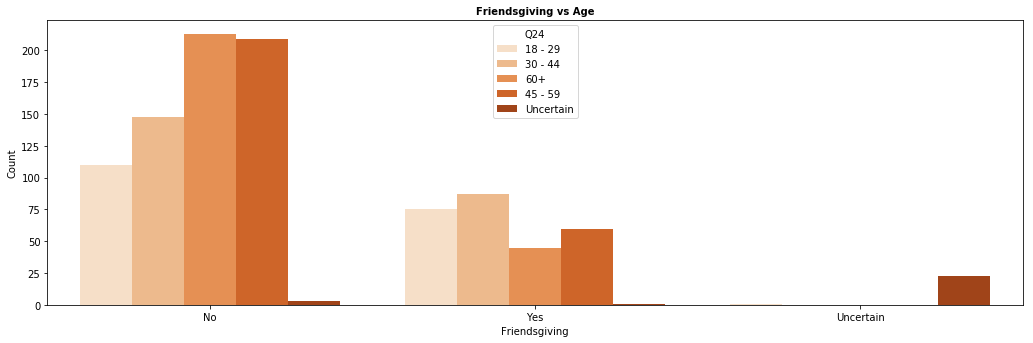

In [9]:
plt.figure(figsize=(10,5))
sns.countplot("Q20", hue="Q24", palette="Oranges",data=df)
plt.title("Friendsgiving vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Friendsgiving")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

To those who voted yes, the age of 45 or younger attended a Friendsgiving with their friends.

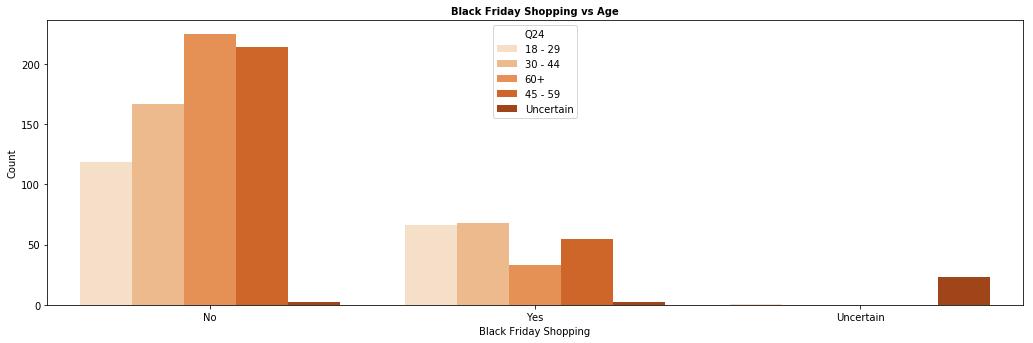

In [10]:

plt.figure(figsize=(10,5))
sns.countplot("Q21", hue="Q24", palette="Oranges",data=df)
plt.title("Black Friday Shopping vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Black Friday Shopping")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

To those who voted yes, the age of 45 or younger enjoy Black Friday shopping.

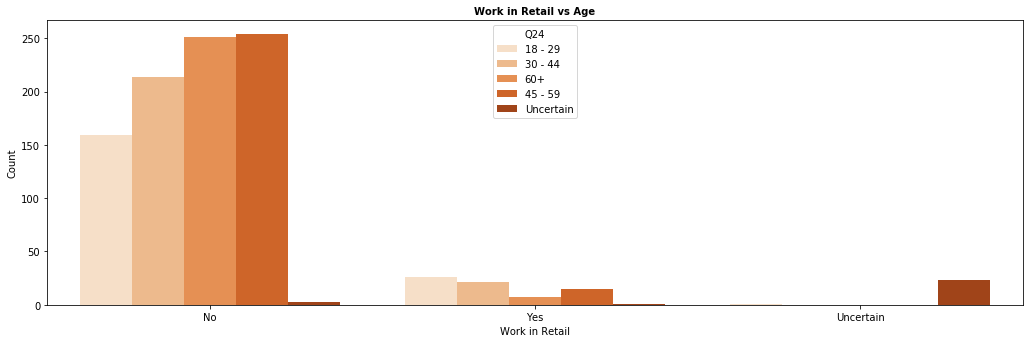

In [11]:
plt.figure(figsize=(10,5))
sns.countplot("Q22", hue="Q24", palette="Oranges",data=df)
plt.title("Work in Retail vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Work in Retail")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Most people in this survey do not work in retail especially older adults. However, to those who voted yes, it's no surprise most millennials work in the retail business.

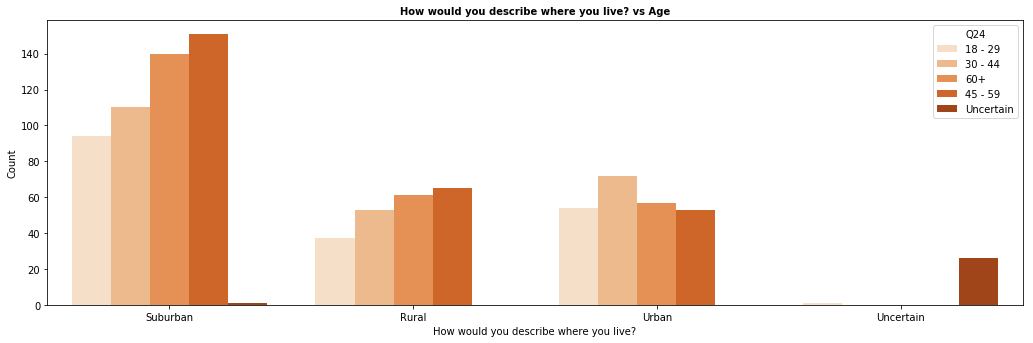

In [12]:
plt.figure(figsize=(10,5))
sns.countplot("Q23", hue="Q24", palette="Oranges",data=df)
plt.title("How would you describe where you live? vs Age",fontsize=10,fontweight="bold")
plt.xlabel("How would you describe where you live?")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Most people live in the suburban area based on this surveys. With Suburban and Rural, the age groups got older in both groups.

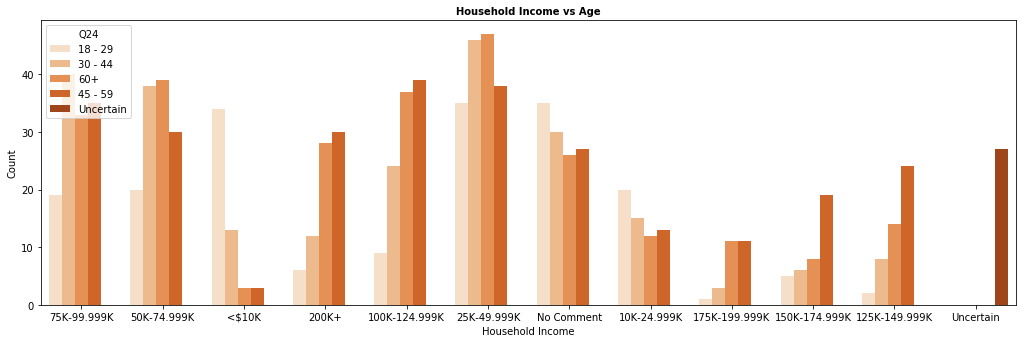

In [13]:

plt.figure(figsize=(10,5))
sns.countplot("Q26", hue="Q24", palette="Oranges",data=df)
plt.title("Household Income vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Household Income")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

The majority of the people who took this survey make a modest amount of money on a yearly basis.

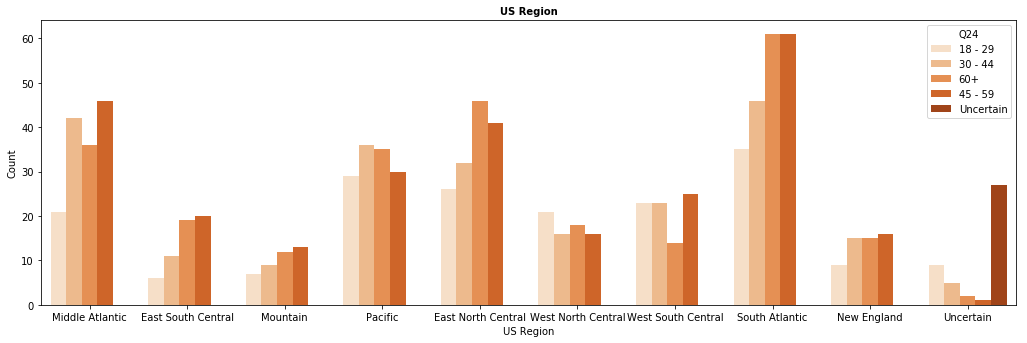

In [14]:
plt.figure(figsize=(10,5))
sns.countplot("Q27", hue="Q24", palette="Oranges",data=df)
plt.title("US Region",fontsize=10,fontweight="bold")
plt.xlabel("US Region")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Based on this category, the regions are diverse. More older adults represent better in this category.

# Preprocessing Data

In [15]:
Q1= LabelEncoder()
Q2= LabelEncoder()
Q3= LabelEncoder()
Q4= LabelEncoder()
Q5= LabelEncoder()
Q6= LabelEncoder()
Q7= LabelEncoder()
Q8= LabelEncoder()
Q9= LabelEncoder()
Q10= LabelEncoder()
Q11= LabelEncoder()
Q12= LabelEncoder()
Q13= LabelEncoder()
Q14= LabelEncoder()
Q15= LabelEncoder()
Q16= LabelEncoder()
Q17= LabelEncoder()
Q18= LabelEncoder()
Q19= LabelEncoder()
Q20= LabelEncoder()
Q21= LabelEncoder()
Q22= LabelEncoder()
Q23= LabelEncoder()
Q24= LabelEncoder()
Q25= LabelEncoder()
Q26= LabelEncoder()
Q27= LabelEncoder()

df['Q1']=Q1.fit_transform(df['Q1'])
df['Q2']=Q2.fit_transform(df['Q2'])
df['Q3']=Q3.fit_transform(df['Q3'])
df['Q4']=Q4.fit_transform(df['Q4'])
df['Q5']=Q5.fit_transform(df['Q5'])
df['Q6']=Q6.fit_transform(df['Q6'])
df['Q7']=Q7.fit_transform(df['Q7'])
df['Q8']=Q8.fit_transform(df['Q8'])
df['Q9']=Q9.fit_transform(df['Q9'])
df['Q10']=Q10.fit_transform(df['Q10'])
df['Q11']=Q11.fit_transform(df['Q11'])
df['Q12']=Q12.fit_transform(df['Q12'])
df['Q13']=Q13.fit_transform(df['Q13'])
df['Q14']=Q14.fit_transform(df['Q14'])
df['Q15']=Q15.fit_transform(df['Q15'])
df['Q16']=Q16.fit_transform(df['Q16'])
df['Q17']=Q17.fit_transform(df['Q17'])
df['Q18']=Q18.fit_transform(df['Q18'])
df['Q19']=Q19.fit_transform(df['Q19'])
df['Q20']=Q20.fit_transform(df['Q20'])
df['Q21']=Q21.fit_transform(df['Q21'])
df['Q22']=Q22.fit_transform(df['Q22'])
df['Q23']=Q23.fit_transform(df['Q23'])
df['Q24']=Q24.fit_transform(df['Q24'])
df['Q25']=Q25.fit_transform(df['Q25'])
df['Q26']=Q26.fit_transform(df['Q26'])
df['Q27']=Q27.fit_transform(df['Q27'])


In [16]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.998974,6.489231,1.795897,0.268718,0.689231,1.830769,0.475897,1.410256,1.678974,1.574359,...,3.247179,0.756923,0.574359,0.484103,0.168205,1.290256,1.697436,0.499487,5.752821,4.305641
std,0.032026,1.518414,1.896280,0.735989,0.824943,0.555980,0.499675,0.910749,0.732439,0.817141,...,4.389346,0.957726,0.891644,0.842593,0.532722,1.065059,1.135458,0.552900,3.256557,2.857484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000
50%,1.000000,7.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,6.000000,5.000000
75%,1.000000,7.000000,4.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,6.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,1.000000,8.000000,6.000000
max,1.000000,8.000000,5.000000,4.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,12.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,11.000000,9.000000


# Correlations

Text(0.5,1,'Thanksgiving Correlations')

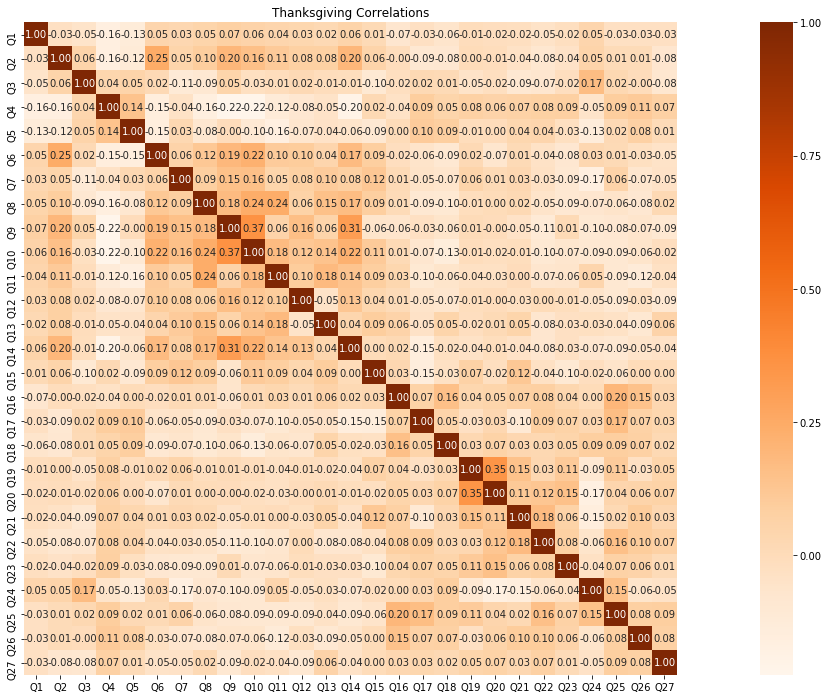

In [17]:
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),cmap = 'Oranges',annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Thanksgiving Correlations')

In [18]:
corr=df.corr()['Q24']
corr[np.argsort(corr,axis=0)[::-1]]

Q24    1.000000
Q3     0.168699
Q25    0.152662
Q18    0.087328
Q2     0.053787
Q1     0.047925
Q11    0.045890
Q17    0.032753
Q6     0.032652
Q16    0.002209
Q15   -0.016767
Q13   -0.028278
Q23   -0.037673
Q27   -0.045515
Q12   -0.054693
Q4    -0.054952
Q22   -0.058354
Q26   -0.060229
Q14   -0.074121
Q8    -0.074436
Q19   -0.089416
Q10   -0.091362
Q9    -0.095925
Q5    -0.130081
Q21   -0.149369
Q7    -0.165778
Q20   -0.168912
Name: Q24, dtype: float64

# Training Set

In [19]:
X= df[['Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q25', 'Q26', 'Q27']]
y=df['Q24']

I chose these variables because of what type of age group has the best in each category. They will fit with my tests perfectly:

#Q19. Have you ever tried to meet up with hometown friends on Thanksgiving night?

#Q20. Have you ever attended a Friendsgiving?

#Q21. Will you shop any Black Friday sales on Thanksgiving Day?

#Q22. Do you work in retail?

#Q23. How would you describe where you live?

#Q25. What is your gender?

#Q26. How much total combined money did all members of your HOUSEHOLD earn last year?

#Q27. US Region

# Model Specifications

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Logistic Regression

In [21]:
import timeit

%timeit pass

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("The Logistic Regression results are below:")
print("Accuracy:",lr_acc_score*100)
print("F1:",f1_score(y_test, lr_predict, average="macro")*100)
print("Precision:",precision_score(y_test,lr_predict, average="macro")*100)
print("Recall:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Cross Validation:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")

print("Here is the confusion matrix below:\n",lr_conf_matrix)

12.8 ns ± 0.0458 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Logistic Regression results are below:
Accuracy: 37.54266211604095
F1: 46.74515266708706
Precision: 51.290000682126745
Recall: 47.35577670322626
Cross Validation: [35.37117904 28.94736842 33.33333333]


Here is the confusion matrix below:
 [[11 17  7 23  0]
 [ 5 22 13 29  0]
 [ 3 13 23 42  0]
 [ 2 15 14 42  0]
 [ 0  0  0  0 12]]


Gradient Boosting Classifier

In [22]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

13 ns ± 0.124 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Gradient Boosting Classifier results are below:
Accuracy: 34.8122866894198
F1: 45.046136672342634
Precision 45.7479205675927
Recall: 45.41912453210229
Cross Validation: [36.68122271 33.33333333 37.77777778]


Here is the confusion matrix below:
 [[17 19  9 13  0]
 [16 13 18 22  0]
 [ 3 15 24 39  0]
 [ 9 14 14 36  0]
 [ 0  0  0  0 12]]


Random Forest Classifier

In [23]:
%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\n')
print("The Random Forest Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_rfc )*100)
print("F1:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Cross Validation:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_rfc))

12.8 ns ± 0.116 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Random Forest Classifier results are below:
Accuracy: 35.153583617747444
F1: 46.05586931403405
Precision: 46.32057508886778
Recall: 45.888014896661254
Cross Validation: [31.44104803 29.8245614  36.88888889]


Here is the confusion matrix below:
 [[20 17  8 13  0]
 [10 17 28 14  0]
 [10 21 27 23  0]
 [10 17 19 27  0]
 [ 0  0  0  0 12]]


Support Vector Machine (Classifier)

In [24]:
%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("The Support Vector Machine (Classifier) results are below:")
print("Accuracy:",accuracy_score(y_test,pred_svc )*100)
print("F1:",f1_score(y_test, pred_svc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_svc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Cross Validation:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_svc))

13 ns ± 0.0768 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Support Vector Machine (Classifier) results are below:
Accuracy: 32.76450511945392
F1: 43.54910622273004
Precision: 44.48642930192966
Recall: 43.832403940089826
Cross Validation: [27.51091703 27.19298246 37.77777778]


Here is the confusion matrix below:
 [[15 25  7 11  0]
 [15 17 13 24  0]
 [ 5 21 19 36  0]
 [10 16 14 33  0]
 [ 0  0  0  0 12]]


How you chose your model specification and what alternatives you compared it to:

I chose Logistic Regression because it was straightforward to use and easy to train. I chose Gradient Boosting because of the decision trees that can predict which age group has the most popularity with each of the questions. Also, it handles null values, which may be the most useful model for my dataset. I chose Random Forest because it is faster to produce results. Also, my data is not all balanced so this feature is efficient to use. I chose Support Vector Classifier due to its flexibility for datasets.

Gradient Boosting, Random Forest, Support Vector Classifier, and Logistic Regression were the models I chose for this based on the lessons I read. I checked on all those 4 models to determine which model would fit accurately with my model.

Support Vector Classifier had the lowest accuracy score of 32.76% and the lowest overall for cross-validation scores. Gradient Boosting had the second lowest accuracy score of 34.81%. Random Forest had the second highest accuracy score of 35.15%. Logistic Regression had the highest accuracy score with 37.15%.

The cross-validation scores were not consistent with the accuracy scores because Gradient Boosting had higher cross-validation scores than Random Forest and Logistic Regression despite it was the second lowest accuracy score.

The practical uses of your model for an audience of interest:

The purpose of the dataset was to see how everything correlated together and it seems most young people who try to meet up with other friends on Thanksgiving enjoy Black Friday shopping and those type of people work in the retail business. These surveys can inspire other people to try out other activities during that holiday season. 

Any weak points or shortcomings of your model:

The correlations in the variables (even after trying to drop to variables) did not correlate high with all of the other ones.  The accuracy rates may have gone higher if some of the respondents actually were honest during the survey (only 1 respondent said they did not celebrate Thanksgiving, for example). However, because there was four different age groups, there was a 25% chance that someone would have a chance of guessing the age group accurately. Therefore, my accuracy rates for those four models were not as bad as I anticipated.
